<a href="https://colab.research.google.com/github/hemptastic-2020/AIML/blob/master/ML_LAB_7_SPANDAN_PAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [7]:
from google.colab import files
uploaded = files.upload()

Saving china_gdp.csv to china_gdp (1).csv


In [8]:
data=pd.read_csv("china_gdp.csv",delimiter=",")

In [9]:
data

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [10]:
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [11]:
data.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


In [12]:
data.shape

(55, 2)

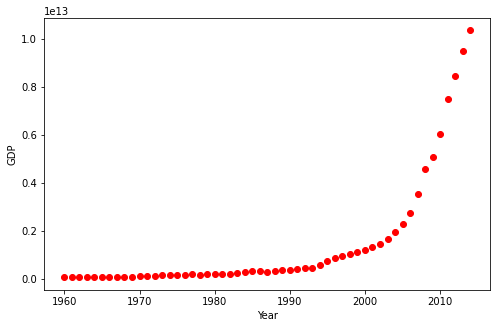

In [13]:
plt.figure(figsize=(8,5))
x_data, y_data = (data["Year"].values, data["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [14]:
x=np.asarray(data['Year'])
y=np.asarray(data['Value'])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [16]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

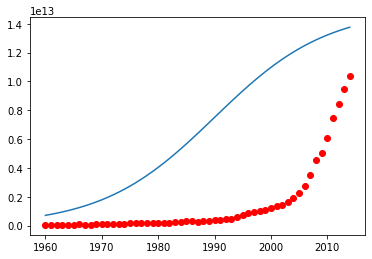

In [17]:
beta_1 = 0.10
beta_2 = 1990.0
Y_pred = sigmoid(x_data, beta_1 , beta_2)
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [18]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


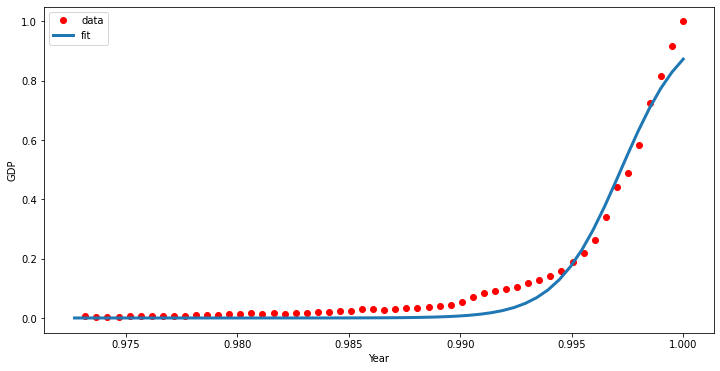

In [20]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(12,6))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [21]:
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [22]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [23]:
y_hat = sigmoid(test_x, *popt)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.98
